In [5]:
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

CRWD


[*********************100%%**********************]  1 of 1 completed


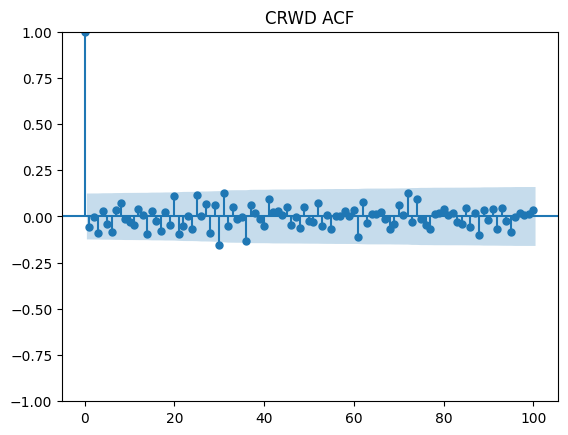

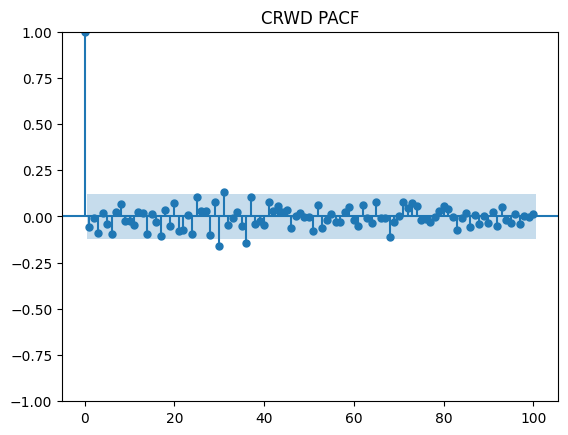

[*********************100%%**********************]  1 of 1 completed

AMD


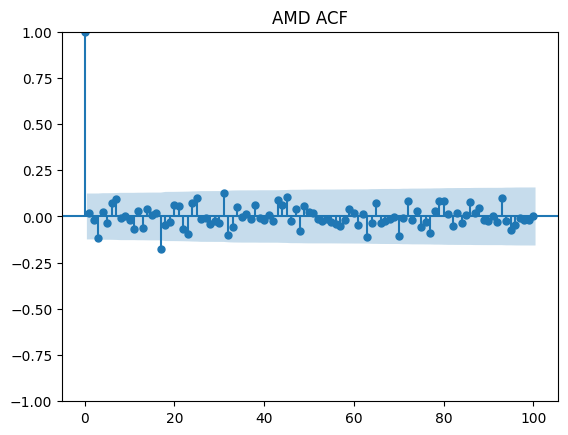

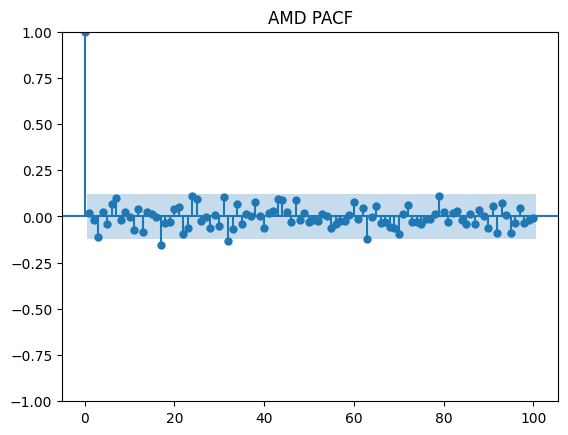

[*********************100%%**********************]  1 of 1 completed

DASH


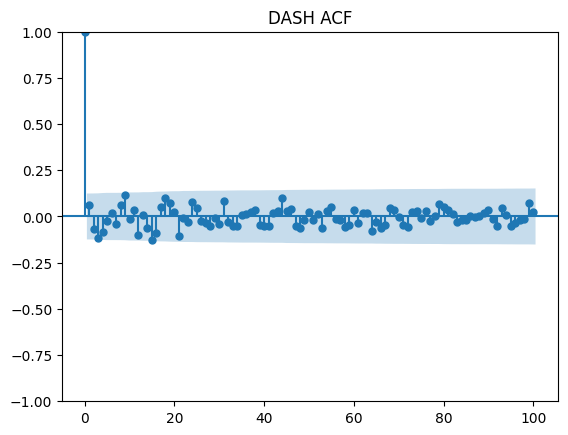

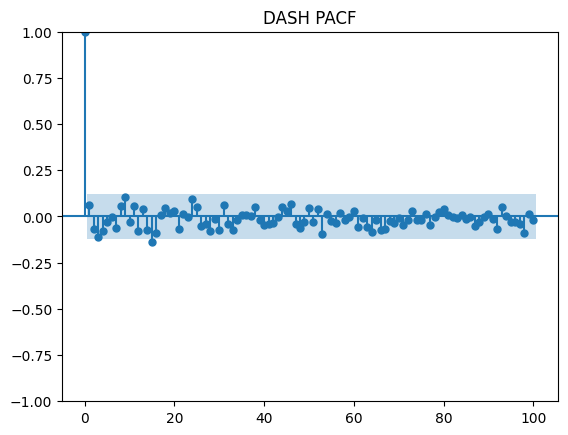

[*********************100%%**********************]  1 of 1 completed

CDNS


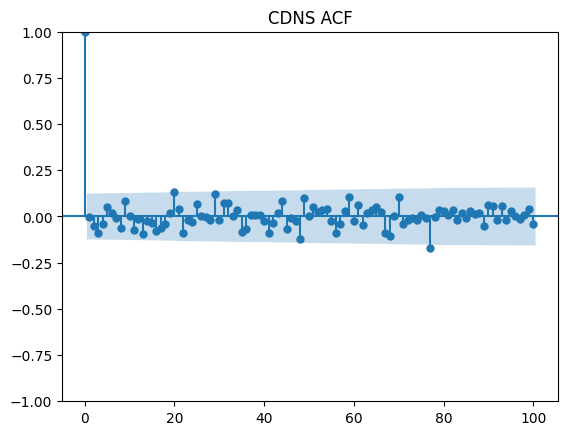

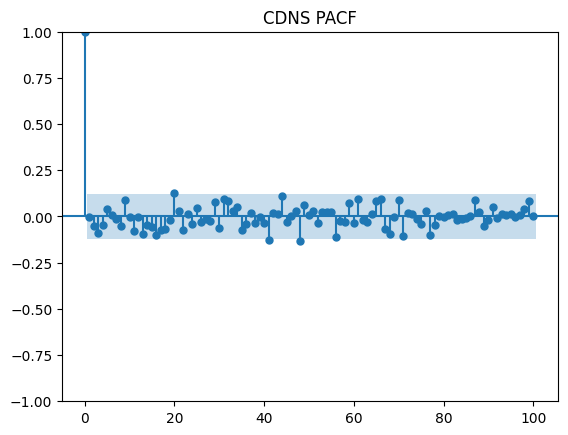

[*********************100%%**********************]  1 of 1 completed

ADBE


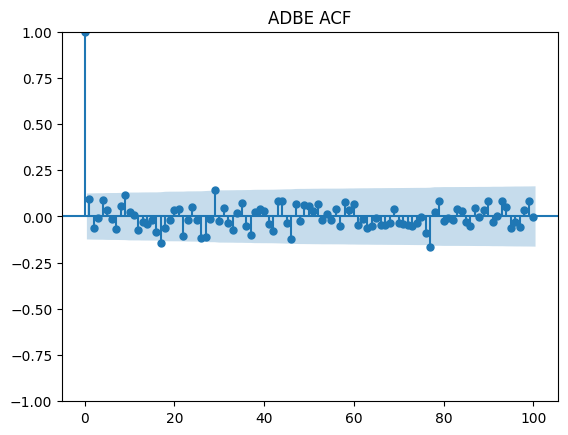

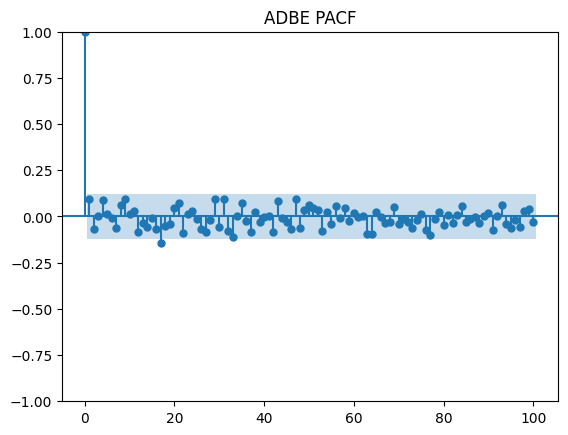

[*********************100%%**********************]  1 of 1 completed

MSFT


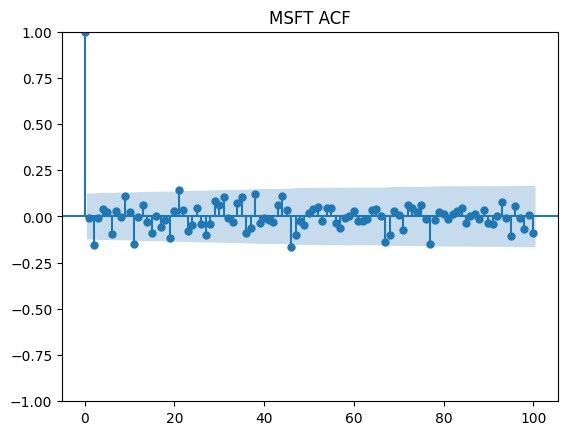

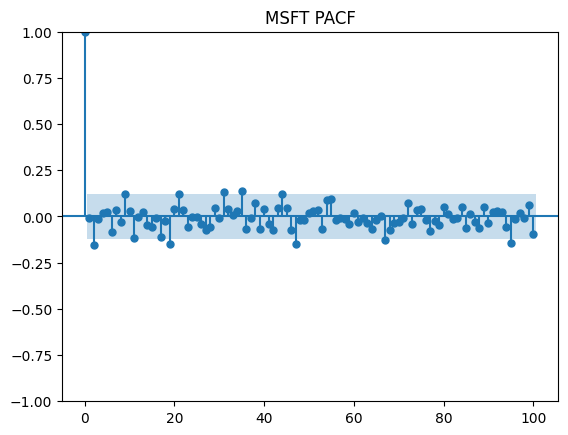

[*********************100%%**********************]  1 of 1 completed

III.L


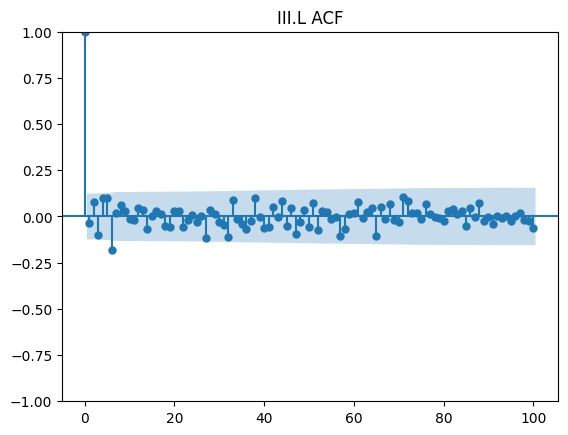

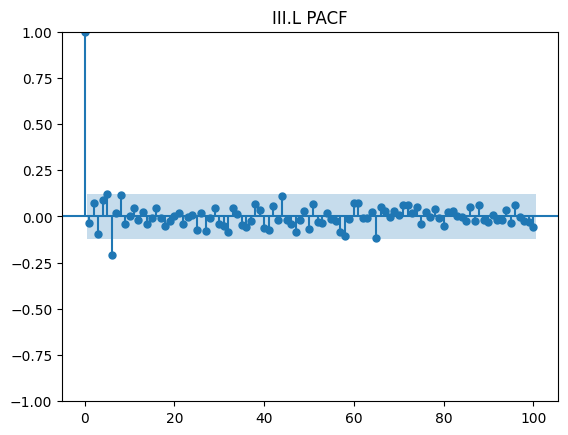

[*********************100%%**********************]  1 of 1 completed

CPRT


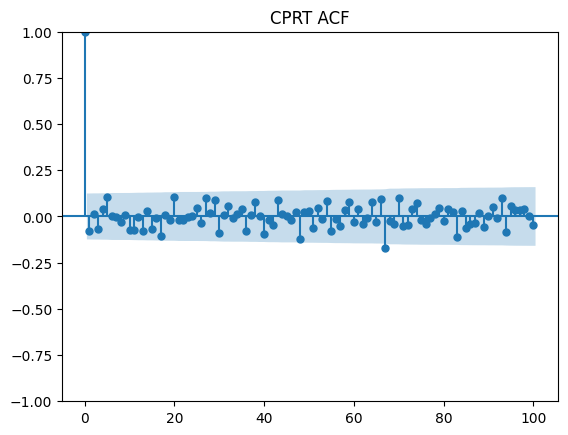

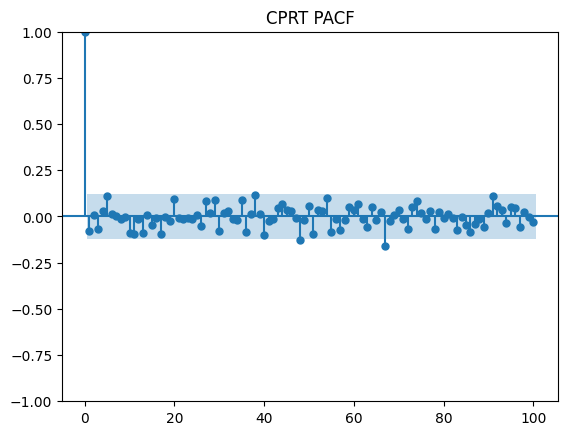

[*********************100%%**********************]  1 of 1 completed

BKNG


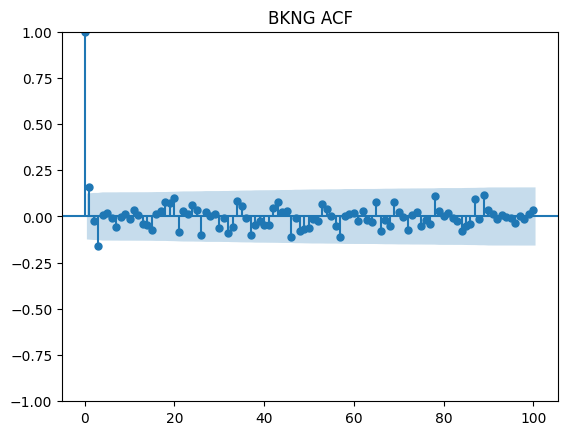

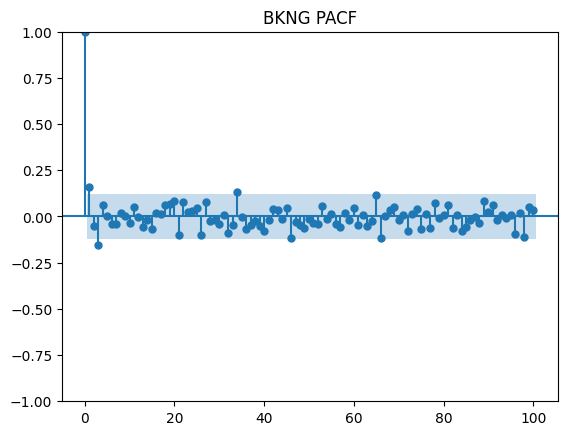

[*********************100%%**********************]  1 of 1 completed

AMZN


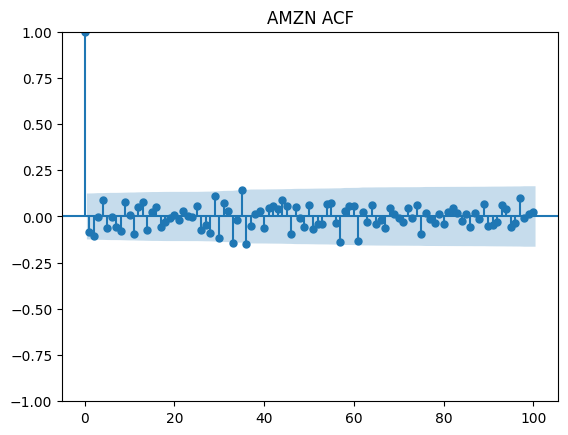

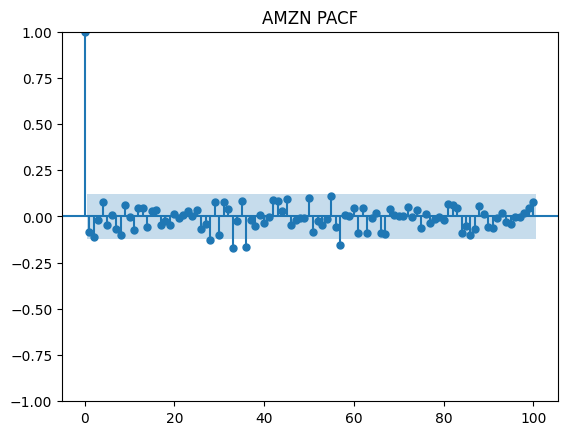

In [6]:
start_date = '2023-01-01'
end_date = '2024-01-01'
# tickers = ['NXE', 'CCL', 'PR', 'STNE', 'NAT', 'AMD', 'NVDA', 'UEC', 'XP', 'TSLA']
tickers = ['CRWD', 'AMD', 'DASH',  'CDNS', 'ADBE', 'MSFT', 'III.L', 'CPRT', 'BKNG', 'AMZN']

for ticker in tickers:
    print(ticker)
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    # df.dropna(axis=1, inplace=True)
    prices = df['Close']
# prices = data.history(start='2021-01-01', end='2021-04-01').Close
    returns = prices.pct_change().dropna()
    plot_acf(returns, lags=100)
    plt.title(f"{ticker} ACF")
    plot_pacf(returns, lags=100)
    plt.title(f"{ticker} PACF")
    plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    df.dropna(axis=1, inplace=True)
    prices = df['Close']
    returns = prices.pct_change().dropna()
    adf_test = adfuller(returns)
    print(f'ADF Statistic for {ticker}: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ADF Statistic for CRWD: -16.563701
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic for AMD: -15.379590
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic for DASH: -10.263524
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic for CDNS: -15.689694
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic for ADBE: -14.273074
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic for MSFT: -13.477545
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic for III.L: -5.074152
p-value: 0.000016
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
ADF Statistic for CPRT: -17.004022
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic for BKNG: -10.394294
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic for AMZN: -12.940625
p-v

In [8]:
ff_factors = pd.read_csv('data/famafrench_daily_factor.csv')

In [9]:
ff_factors.drop(['Date_str'], axis=1, inplace=True)
ff_factors = ff_factors.set_index('Date')
ff_factors.index = pd.to_datetime(ff_factors.index)

In [10]:
from datetime import datetime
ff_factors = ff_factors.loc[datetime(2023,1,1):]

<Figure size 640x480 with 0 Axes>

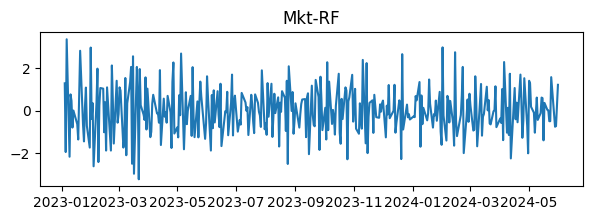

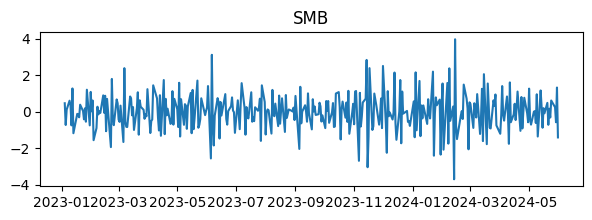

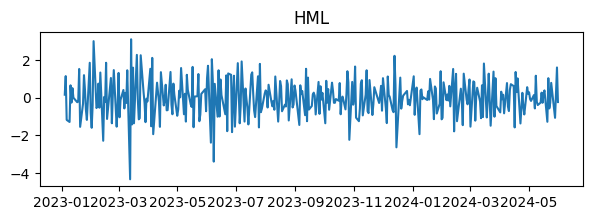

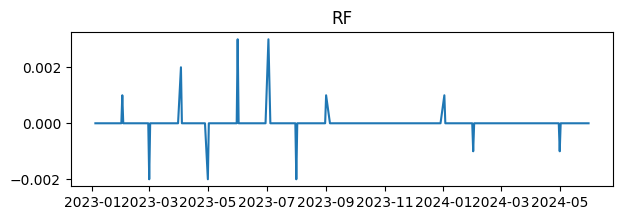

In [11]:
plt.figure()
for factor in list(ff_factors.columns):
    plt.figure(figsize=(7,2))
    plt.plot(ff_factors[factor].diff())
    plt.title(f"{factor}")
    plt.show()

<Figure size 700x200 with 0 Axes>

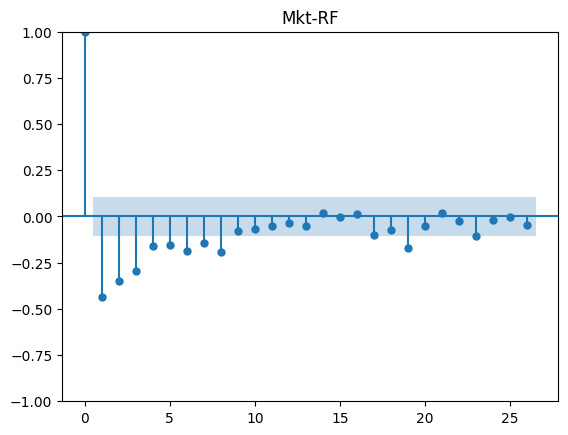

<Figure size 700x200 with 0 Axes>

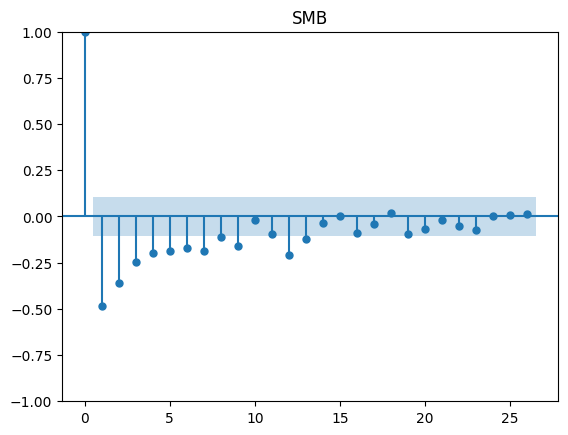

<Figure size 700x200 with 0 Axes>

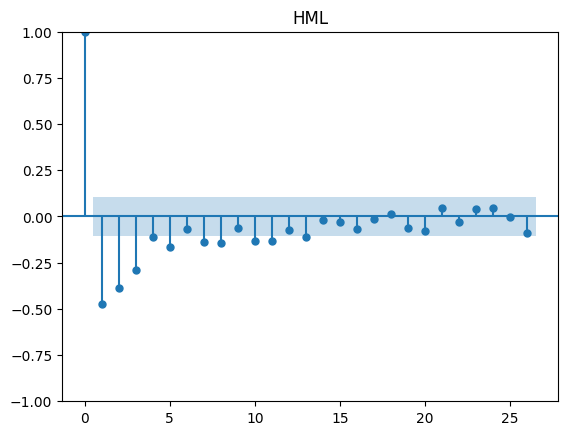

<Figure size 700x200 with 0 Axes>

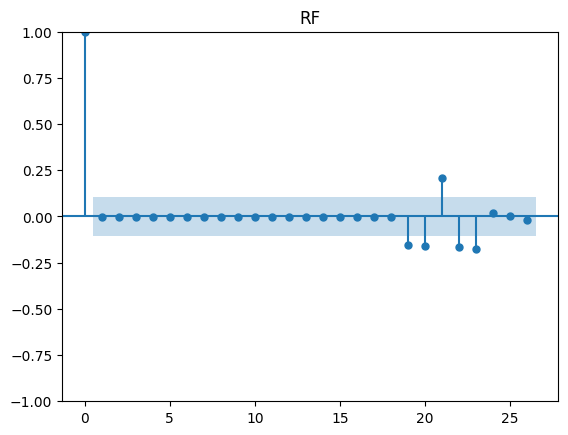

In [12]:
# fig, ax = plt.subplots(nrows=3, ncols=1)
for i, factor in enumerate(list(ff_factors.columns)):
    plt.figure(figsize=(7,2))
    plot_pacf(ff_factors[factor].diff().dropna())
    plt.title(f"{factor}")
    plt.show()